In [32]:
# 导入各个模块
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import export_graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# 数据预处理

In [33]:
# 导入数据集
# 怀孕次数 葡萄糖 血压 皮肤厚度 胰岛素 BMI 糖尿病遗传函数 年龄 是否患有糖尿病
diabetes_df=pd.read_csv("diabetes.csv")
#diabetes_df.info()
#diabetes_df

# 查看是否存在缺失值
#print(diabetes_df.describe())
diabetes_df.isnull().sum()
#diabetes_df.isnull().any()


# 查看每列有多少个缺失值
num_missing=(diabetes_df==0).astype(int).sum(axis=0)
num_missing
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [34]:
# 缺失值替换 将除了怀孕次数的特征里所有有0的缺失值替换为NaN
replace_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df.loc[:,replace_list] = diabetes_df.loc[:,replace_list].replace({0:np.nan})

# 查看每列除怀孕次数的特征以外的缺失值（NaN）总数
diabetes_df.isnull().sum()
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [35]:
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [36]:
# 算特每列特征值的均值的调用函数
def average_value(name):
    # 提取要求平均值的列和是否患有糖尿病的Outcome结果列
    diabetes_s=diabetes_df.loc[:,[name,'Outcome']]
    # sum记录每列非nan值的总合
    sum_0=0
    # num记录每列不是nan的数的个数
    num_0=0
    sum_1=0
    num_1=0

    # 循环768行
    for i in range(768):
        # 先判断这个特征列在该行这个位置的值是否为nan，不是nan就进入
        if (pd.notna(diabetes_s[name][i])):
            # 当Outcome为0，不患糖尿病时，累加特征值
            if(diabetes_s.Outcome[i]==0):
                #print(diabetes_s.Insulin[i])
                sum_0=sum_0+diabetes_s[name][i]
                num_0+=1
            # 当Outcome为1，患糖尿病时，累加特征值
            elif(diabetes_s.Outcome[i]==1):
                sum_1=sum_1+diabetes_s[name][i]
                num_1+=1
    # result_0记录Outcome为0时，特征均值
    result_0=sum_0/num_0
    # result_1记录Outcome为1时，特征均值
    result_1=sum_1/num_1
    result=[result_0,result_1]

    # 将Outcome内的0，1两种情况按从小到大排序
    Outcome_list=sorted(diabetes_s.Outcome.unique())
    # name列表记录函数要返回的表格的列名
    name=['Outcome',name]
    # 建表
    temp=pd.DataFrame(columns=())
    temp.insert(loc=0,value=Outcome_list,column=name[0])
    temp.insert(loc=1,value=result,column=name[1])
    return temp


Text(0, 0.5, '人数(人)')

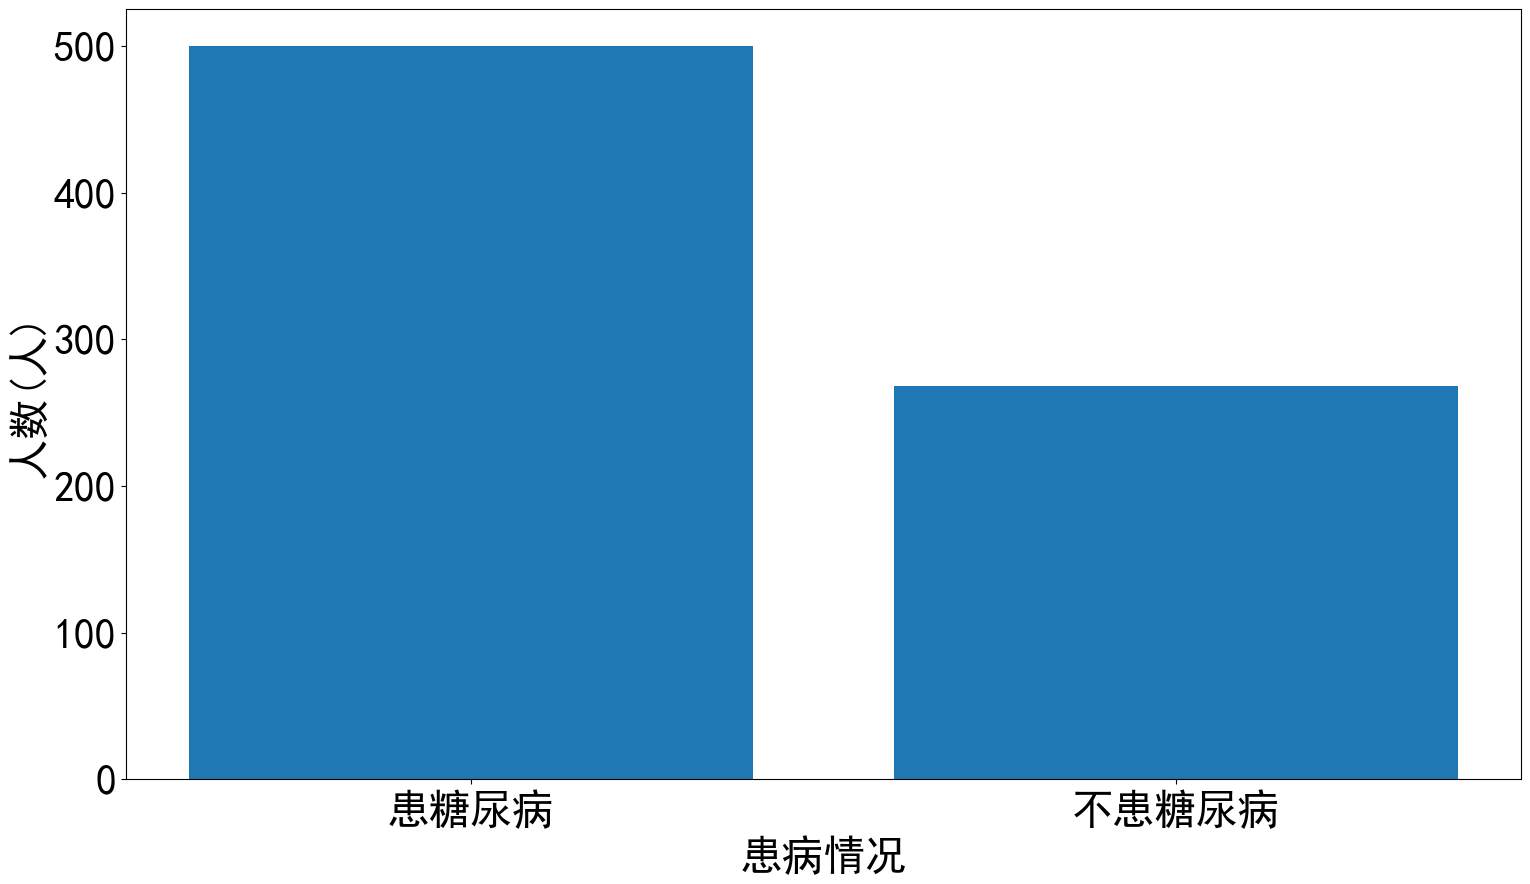

In [37]:
# 统计数据集里有多少人患糖尿病，多少人没患糖尿病
diabetes_0=diabetes_df[diabetes_df['Outcome']==0].count().Outcome
diabetes_1=diabetes_df[diabetes_df['Outcome']==1].count().Outcome
y=[diabetes_0,diabetes_1]
# y

fig=plt.figure(figsize=(18,10))
plt.subplots_adjust(wspace=0.4,hspace=0.4)
index=['患糖尿病','不患糖尿病']
plt.bar(index,y)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('患病情况',fontsize=30)
plt.ylabel('人数(人)',fontsize=30)

# 可见患糖尿病人数超过一半

In [38]:
# 特征值葡萄糖
aver_Glu=average_value('Glucose')
aver_Glu

,Outcome,Glucose
0,0,110.643863
1,1,142.319549


In [39]:
# 将diabetes_df内，葡萄值糖列值为nan的补充为平均
av0=average_value('Glucose')['Glucose'][0]
av1=average_value('Glucose')['Glucose'][1]
diabetes_df.loc[(diabetes_df['Outcome']==0)&(diabetes_df['Glucose'].isnull()),'Glucose']=av0
diabetes_df.loc[(diabetes_df['Outcome']==1)& (diabetes_df['Glucose'].isnull()),'Glucose']=av1

In [40]:
# 特征值血压
aver_blood=average_value('BloodPressure')
aver_blood

,Outcome,BloodPressure
0,0,70.877339
1,1,75.321429


In [41]:
# 将diabetes_df内，血压列值为nan的补充为平均值
av0=average_value('BloodPressure')['BloodPressure'][0]
av1=average_value('BloodPressure')['BloodPressure'][1]
diabetes_df.loc[(diabetes_df['Outcome']==0)&(diabetes_df['BloodPressure'].isnull()),'BloodPressure']=av0
diabetes_df.loc[(diabetes_df['Outcome']==1)& (diabetes_df['BloodPressure'].isnull()),'BloodPressure']=av1

In [42]:
# 特征值皮肤厚度
aver_Skin=average_value('SkinThickness')
aver_Skin

,Outcome,SkinThickness
0,0,27.235457
1,1,33.000000


In [43]:
# 将diabetes_df内，皮肤厚度列值为nan的补充为平均值
av0=average_value('SkinThickness')['SkinThickness'][0]
av1=average_value('SkinThickness')['SkinThickness'][1]
diabetes_df.loc[(diabetes_df['Outcome']==0)&(diabetes_df['SkinThickness'].isnull()),'SkinThickness']=av0
diabetes_df.loc[(diabetes_df['Outcome']==1)& (diabetes_df['SkinThickness'].isnull()),'SkinThickness']=av1

In [44]:
# 特征值胰岛素
aver_Ins=average_value('Insulin')
aver_Ins

,Outcome,Insulin
0,0,130.287879
1,1,206.846154


In [45]:
# 将diabetes_df内，胰岛素列值为nan的补充为平均值
av0=average_value('Insulin')['Insulin'][0]
av1=average_value('Insulin')['Insulin'][1]
diabetes_df.loc[(diabetes_df['Outcome']==0)&(diabetes_df['Insulin'].isnull()),'Insulin']=av0
diabetes_df.loc[(diabetes_df['Outcome']==1)& (diabetes_df['Insulin'].isnull()),'Insulin']=av1


In [46]:
# 特征值BMI
aver_BMI=average_value('BMI')
aver_BMI


,Outcome,BMI
0,0,30.859674
1,1,35.406767


In [47]:
# 将diabetes_df内，BMI素列值为nan的补充为平均值
av0=average_value('BMI')['BMI'][0]
av1=average_value('BMI')['BMI'][1]
diabetes_df.loc[(diabetes_df['Outcome']==0)&(diabetes_df['BMI'].isnull()),'BMI']=av0
diabetes_df.loc[(diabetes_df['Outcome']==1)& (diabetes_df['BMI'].isnull()),'BMI']=av1

In [48]:
# 特征值年龄
aver_Age=average_value('Age')
aver_Age

,Outcome,Age
0,0,31.190000
1,1,37.067164


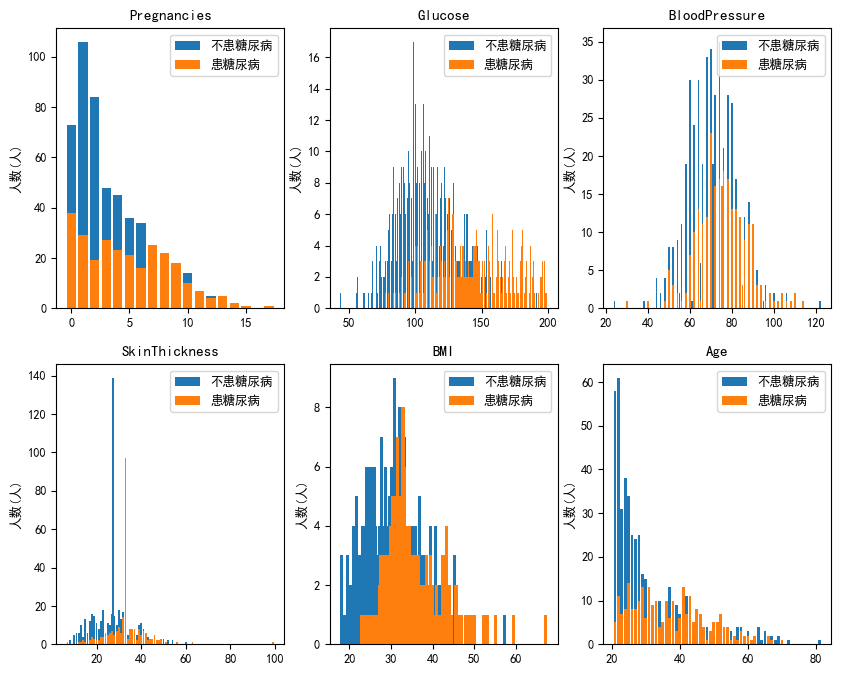

In [49]:
# 对各个特征遍历
i=0
j=0
plt.figure(figsize=(10,8))
for k in ['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Age']:
    plt.subplot2grid((2,3),(j,i))
    #plt.bar(diabetes_df[k].value_counts().index,diabetes_df[k].value_counts().values)
    plt.bar(diabetes_df[k][diabetes_df.Outcome==0].value_counts().index,diabetes_df[k][diabetes_df.Outcome==0].value_counts().values,label='不患糖尿病')
    plt.bar(diabetes_df[k][diabetes_df.Outcome==1].value_counts().index,diabetes_df[k][diabetes_df.Outcome==1].value_counts().values,label='患糖尿病')
    plt.rcParams.update({'font.size': 9})
    plt.legend(loc="upper right")
    plt.ylabel('人数(人)')
    plt.title(k)
    i+=1
    if i==3:
        i=0
        j+=1


In [50]:
# 特征值怀孕次数
aver_Pre=average_value('Pregnancies')
aver_Pre
# 特征值遗传函数
aver_Fun=average_value('DiabetesPedigreeFunction')
aver_Fun

,Outcome,DiabetesPedigreeFunction
0,0,0.429734
1,1,0.550500


In [51]:
temp=[aver_Pre,aver_Glu,aver_blood,aver_Skin,aver_Ins,aver_BMI,aver_Age,aver_Fun]
# 将各个均值合并在同一张表里比较
result=temp[0].merge(temp[1],on='Outcome')
for i in range(7):
    result=pd.merge(result,temp[i+1])
result


,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,DiabetesPedigreeFunction
0,0,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,31.190000,0.429734
1,1,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,37.067164,0.550500


C:\Users\47\AppData\Local\Temp\ipykernel_17916\1868481415.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y, 'ro-', color='#4169E1', alpha=0.8, linewidth=1, label='不患糖尿病')
C:\Users\47\AppData\Local\Temp\ipykernel_17916\1868481415.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, y1, 'ro-', color='pink', alpha=0.8, linewidth=1, label='患糖尿病')


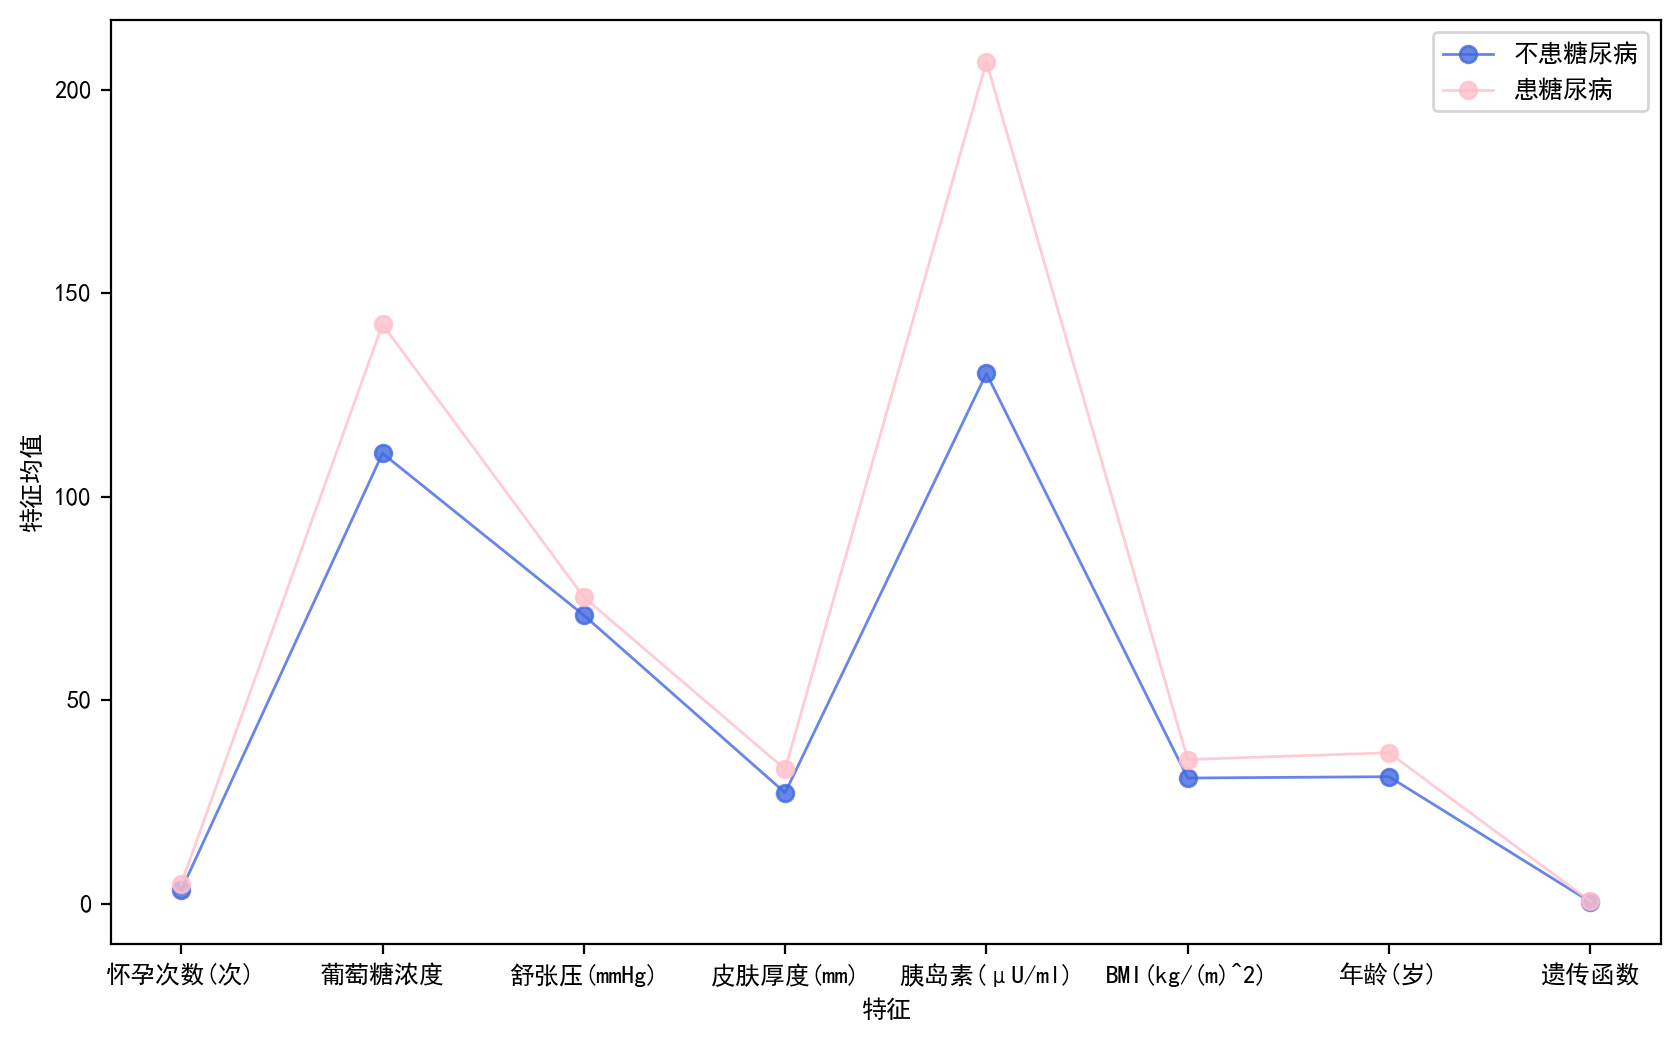

In [62]:
plt.figure(dpi=200,figsize=(10,6))
x = ['怀孕次数(次)','葡萄糖浓度','舒张压(mmHg)','皮肤厚度(mm)','胰岛素(μU/ml)','BMI(kg/(m)^2)','年龄(岁)','遗传函数']
y = result.drop(['Outcome'],axis=1).iloc[0]
y1 = result.drop(['Outcome'],axis=1).iloc[1]

# plot中参数的含义分别是横轴值，纵轴值，线的形状，颜色，透明度,线的宽度和标签
plt.plot(x, y, 'ro-', color='#4169E1', alpha=0.8, linewidth=1, label='不患糖尿病')
plt.plot(x, y1, 'ro-', color='pink', alpha=0.8, linewidth=1, label='患糖尿病')

# 显示标签
plt.legend(loc="upper right")
plt.xlabel('特征')
plt.ylabel('特征均值')

plt.show()


In [ ]:
# 再次查看有无缺省值
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,0,110.643863,70.877339,27.235457,130.287879,30.859674,31.190000
1,1,142.319549,75.321429,33.000000,206.846154,35.406767,37.067164


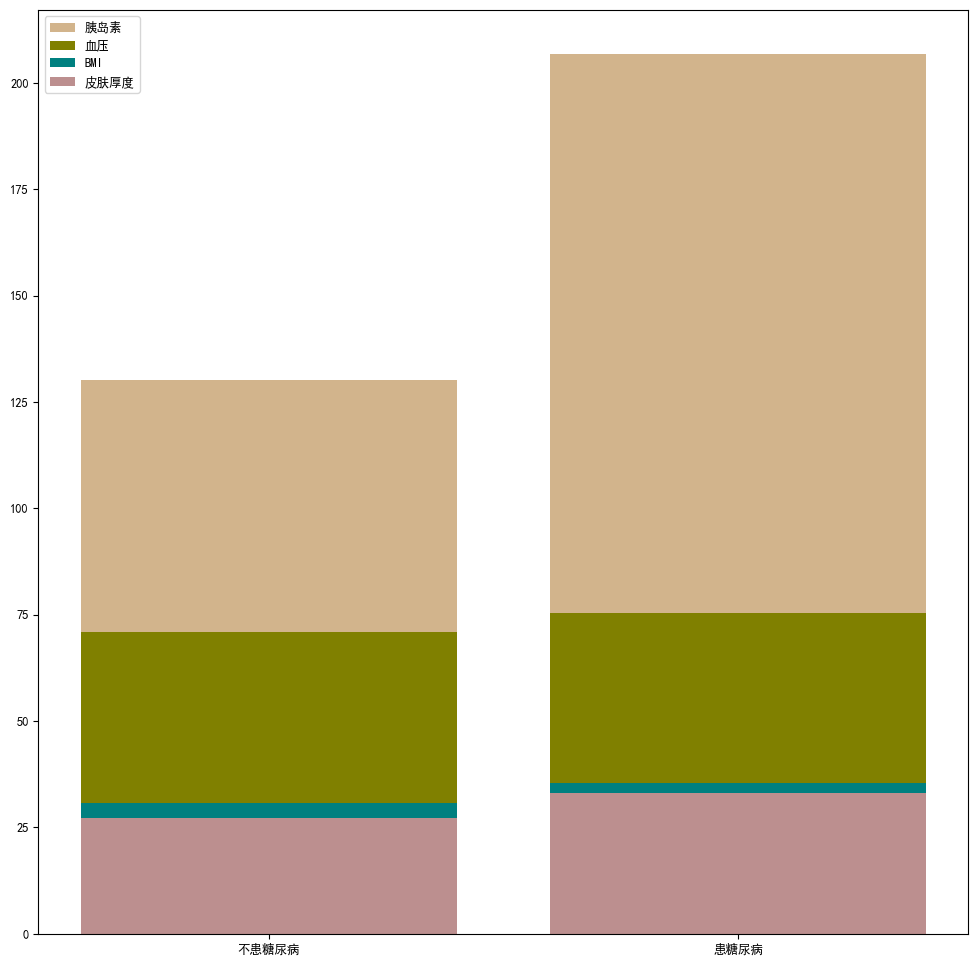

In [ ]:
fig=plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.4,hspace=0.4)
index=['不患糖尿病','患糖尿病']
plt.bar(index,result['Insulin'],color='tan')
plt.bar(index,result['BloodPressure'],color='olive')
plt.bar(index,result['BMI'],color='teal')
plt.bar(index,result['SkinThickness'],color='rosybrown')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.legend(["胰岛素", '血压','BMI','皮肤厚度'],loc='best')
result


In [ ]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.0,130.287879,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,33.0,206.846154,30.1,0.349,47,1


In [ ]:
# 检查是否有缺省值
diabetes_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

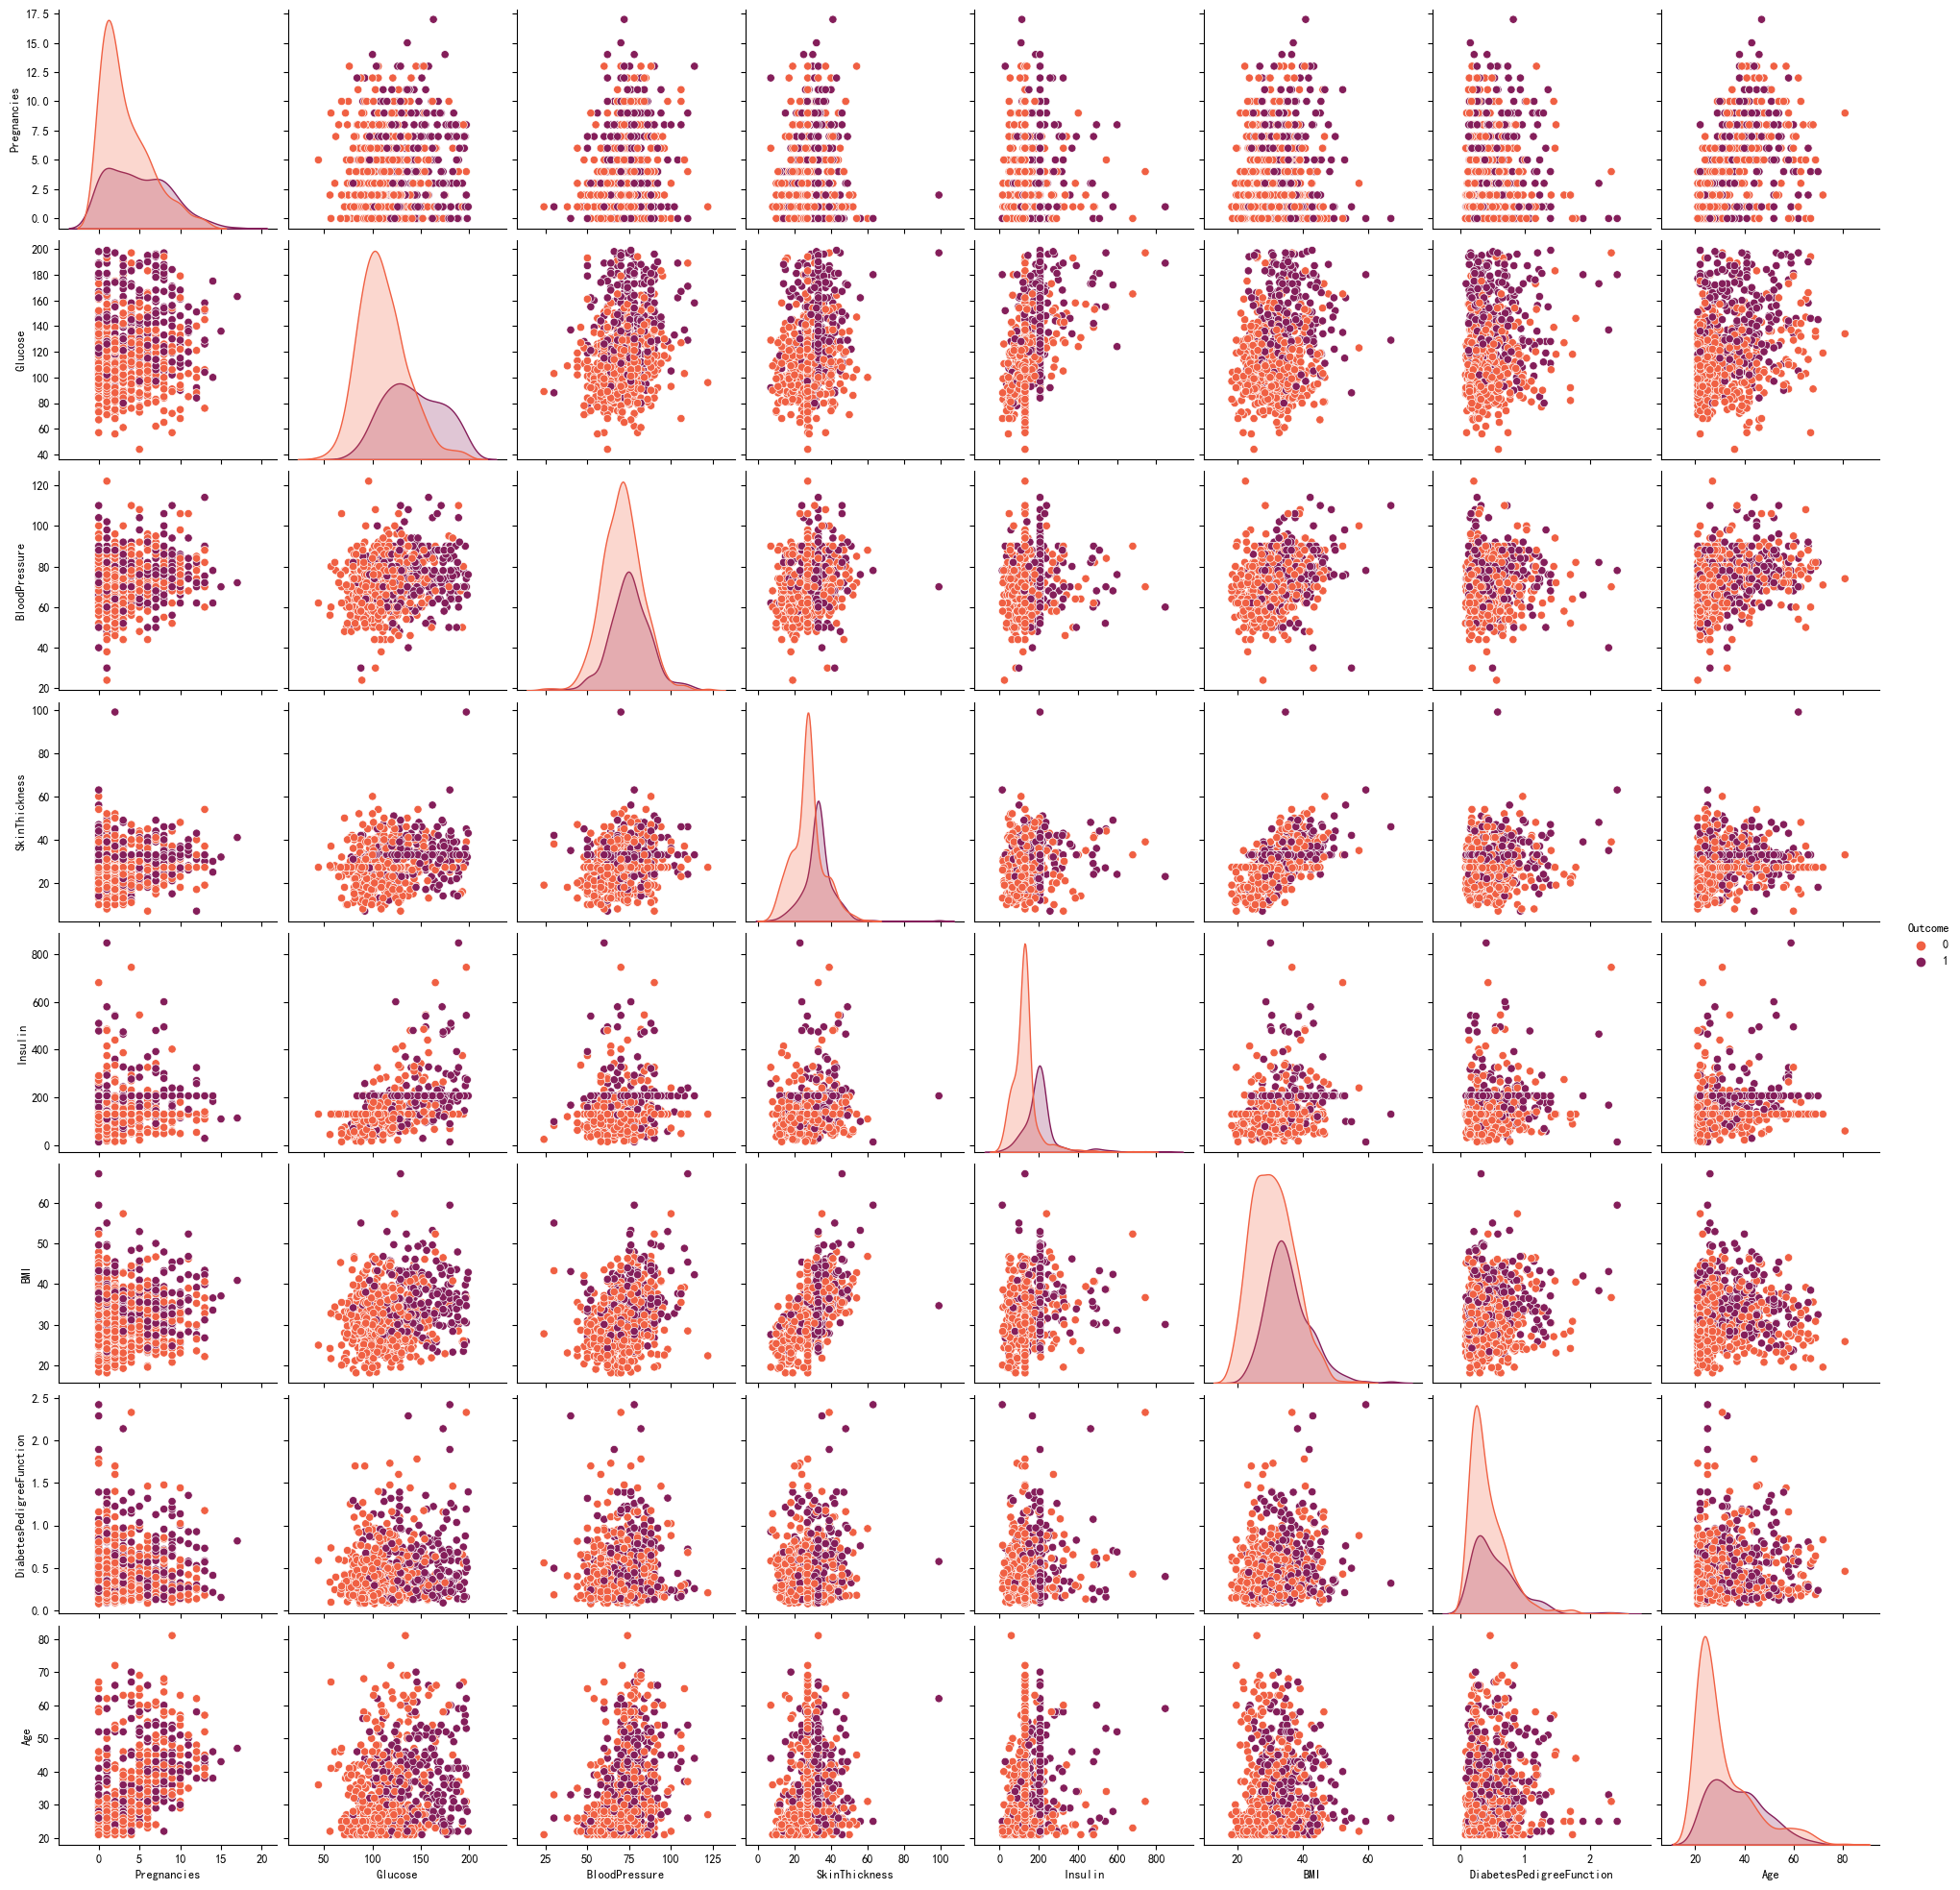

In [63]:
# 以Outcome做标准热力图
sns.pairplot(diabetes_df, hue = 'Outcome',palette='rocket_r'); 

# 特征选取

In [ ]:
# corr_df记录任意两个特征之间的相关系数
corr_df = diabetes_df.corr()

# 单独抽取Outcome特征这一列
temp=corr_df['Outcome'].values

# 将这列相关系数与其名称建表，查看其他特征与目的特征间的相关系数
tempd=pd.DataFrame(columns=())
name=['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age','Outcome']
tempd.insert(value=name,loc=0,column='name')
tempd.insert(value=temp,loc=1,column='corr')
# 对corr列从大到小排列，并将index序号调整变为升序
tempd=tempd.sort_values(by=['corr'],ascending=False).reset_index(drop=True)
tempd

,name,corr
0,Outcome,1.000000
1,Glucose,0.495954
2,Insulin,0.410918
3,BMI,0.315271
4,SkinThickness,0.308094
5,Age,0.238356
6,Pregnancies,0.221898
7,BloodPressure,0.175087
8,DiabetesPedigreeFunction,0.173844


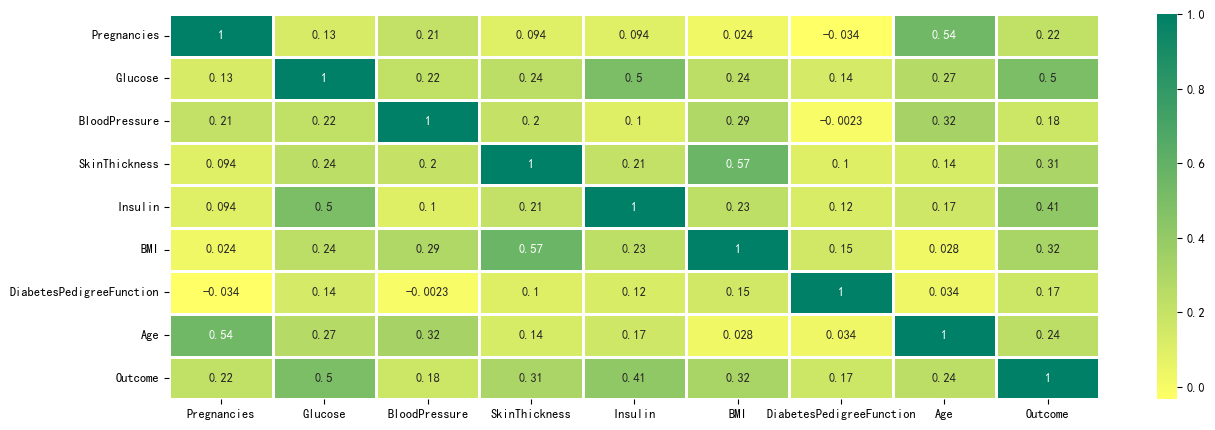

In [ ]:
# 热力图展示各个特征值间相关系数大小关系
plt.figure(figsize=(15, 5), facecolor='w')
sns.heatmap(data=corr_df, vmax=1, square=False, annot=True, linewidth=1, cmap=plt.cm.summer_r);

In [ ]:
# 最后查看一次数据描述信息，可以看到有些特征值min不再为0，说明已无缺省值
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


In [ ]:
# 查看没有患糖尿病的数据集信息
diabetes_df[diabetes_df['Outcome']==0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,110.643863,70.877339,27.235457,130.287879,30.859674,0.429734,31.190000,0.0
std,3.017185,24.702314,11.927450,8.516280,74.400559,6.501303,0.299085,11.667655,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,93.000000,63.500000,22.000000,95.000000,25.750000,0.229750,23.000000,0.0
50%,2.000000,107.500000,70.877339,27.235457,130.287879,30.400000,0.336000,27.000000,0.0
75%,5.000000,125.000000,78.000000,31.000000,130.287879,35.300000,0.561750,37.000000,0.0
max,13.000000,197.000000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [ ]:
# 查看患糖尿病的数据集信息
diabetes_df[diabetes_df['Outcome']==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.319549,75.321429,33.000000,206.846154,35.406767,0.550500,37.067164,1.0
std,3.741239,29.488132,11.925638,8.456099,92.237987,6.590161,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,30.000000,175.000000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.500000,75.321429,33.000000,206.846154,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,206.846154,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


# 数据标准化

In [ ]:
# 标准化数据
transfer=StandardScaler()

# fit_transform为找出均值与方差并应用
drop_df=diabetes_df.drop(['Outcome'],axis=1)
drop_df=transfer.fit_transform(drop_df)

transfer_pd=pd.DataFrame(drop_df,columns=['Pregnancies','Glucose','BloodPressure',
'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
# 显示前五行
transfer_pd.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.864020,-0.035389,0.645088,0.561272,0.167806,0.468492,1.425995
1,-0.844885,-1.205478,-0.531332,-0.027701,-0.300842,-0.850452,-0.365061,-0.190672
2,1.233880,2.013741,-0.696647,0.420825,0.561272,-1.330487,0.604397,-0.105584
3,-0.844885,-1.074081,-0.531332,-0.700491,-0.709475,-0.632253,-0.920763,-1.041549
4,-1.141852,0.502679,-2.680419,0.645088,0.123830,1.549727,5.484909,-0.020496


# 模型构建


In [ ]:
#查看数据集中糖尿病患者的人数
diabetes_df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

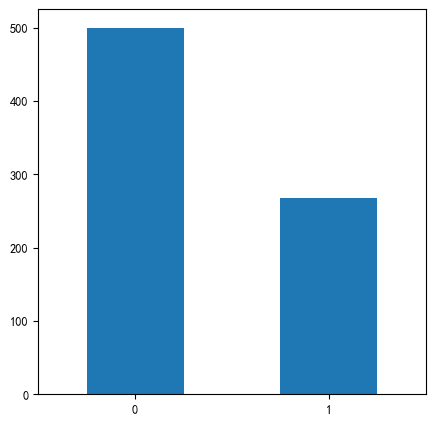

In [ ]:
#画出柱状图查看
plt.figure(figsize=(5,5),facecolor='w')
diabetes_df.Outcome.value_counts().plot.bar()
plt.xticks(rotation = 0)

In [ ]:
#输出患病率
print("患病率为： %.2f %%" % (diabetes_df.Outcome.value_counts()[1] / diabetes_df.shape[0] * 100))

患病率为： 34.90 %


In [ ]:
#将数据集分成两部分80%当作训练集20%当作测试集。
#训练集用于模型的训练
#测试集用于模型结果的预测
sourcey = diabetes_df.Outcome
sourcex = transfer_pd
trainx,testx,trainy,testy = train_test_split(sourcex,sourcey,train_size=0.8,random_state=0)

#展示分配结果
print('原始数据集特征：', sourcex.shape,'训练数据集特征：', trainx.shape,'测试数据集特征：', testx.shape)

print('原始数据集标签：', sourcey.shape,'训练数据集标签：', trainy.shape,'测试数据集标签：', testy.shape)



原始数据集特征： (768, 8) 训练数据集特征： (614, 8) 测试数据集特征： (154, 8)
原始数据集标签： (768,) 训练数据集标签： (614,) 测试数据集标签： (154,)


## 训练模型


In [ ]:
#利用逻辑回归算法训练模型
Log = LogisticRegression()
Log.fit(trainx,trainy)
preds = Log.predict(testx)

# 评估模型

混淆模型

在混淆矩阵中可知，154名皮马印第安女性中，被正确识别为未患糖尿病的正常人数量为95名， 被正确识别为患糖尿病的糖尿病患者数量为29名，被识别为未患糖尿病的糖尿病患者为12名，被识别为糖尿病的正常人为18名

In [ ]:
confusion_matrix(testy,preds)

array([[95, 12],
       [18, 29]], dtype=int64)

准确率

表示模型预测皮马印第安人是否患糖尿病的准确程度。最终计算结果为80.52%。

In [ ]:
accuracy_score(testy, preds)

0.8051948051948052

# 决策树

In [ ]:
#决策树可视化
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
from dtreeviz.trees import dtreeviz

#基于信息熵，建立决策树模型
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(trainx,trainy)#训练模型
prediction = dtc.predict(testx)

viz = dtreeviz(dtc,
               trainx,
               trainy,
               target_name="Outcome",
               feature_names=trainx.columns,
               class_names=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
)

viz.view()

d:\Program Files\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Program Files\python\lib\site-packages\dtreeviz\trees.py:1089: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig(filename, bbox_inches='tight', pad_inches=0)


# 评估模型

准确率

表示模型预测皮马印第安人是否患糖尿病的准确程度。最终计算结果为90.26%。

In [ ]:
#计算准确率
print('The accuracy of the Decision Tree is: ',metrics.accuracy_score(prediction,testy))

The accuracy of the Decision Tree is:  0.9025974025974026
